# Deep learning from scratch

# Learning objectives of the notebook

- Appreciate that machine learning is a technical, cultural, economic, and social discipline that has the ability to consolidate and re-arrange power structures;
- Build simple ML models for classification and regression using `scikit-learn`;
- Hand-code forward propagation for single and multilayer perceptrons using `numpy`;
- Incorporate non-linearities into neural networks using activation functions;
- Hand-code gradient descent using `numpy`;
- Understand the basics of backward propagation.

# 1. An Introduction to Machine Learning

Machine learning is the science and art of teaching computers to "learn" patterns from data. In some ways, we can consider it a subdiscipline of data science, which is often sliced into

* Descriptive analytics (BI, classic analytics, dashboards),
* Predictive analytics (machine learning), and
* Prescriptive analytics (decision science).

Machine learning itself is often sliced into

* Supervised learning (predicting a label: classification, or a continuous variable),
* Unsupervised learning (pattern recognition for unlabelled data, a paradigm being clustering),
* Reinforcement learning, in which software agents are placed in constrained environments and given “rewards” and “punishments” based on their activity (AlphaGo Zero, self-driving cars). 


This workshop is an introduction to deep learning, a powerful form of machine learning that has garnered much attention for its successes in computer vision (e.g. image recognition) and natural language processing.

At the outset, we'd like to make clear that data science and machine learning are powerful technologies that can do both harm and good. As [Cathy O'Neil has said](https://www.datacamp.com/community/podcast/weapons-math-destruction), 

> "data science doesn't just predict the future. It creates the future."

For example,

* [There are runaway feedback loops in “predictive policing”](https://www.smithsonianmag.com/innovation/artificial-intelligence-is-now-used-predict-crime-is-it-biased-180968337/), whereby more police are sent to neighborhoods with higher “reported & predicted crime,” resulting in more police being sent there and more reports of crime and so on.
* Google search encodes all types of cultural and societal biases, such as racial discrimination, as investigated in Safiya Noble’s [Algorithms of Oppression](https://nyupress.org/9781479837243/algorithms-of-oppression/). An example of this is that, for many years, when using Google image search with the keyword “beautiful,” the results would be dominated by photos of white women. In the words of Ruha Benjamin, Associate Professor of African American Studies at Princeton University, [“race and technology are co-produced.”](https://www.ruhabenjamin.com/race-after-technology) 
* There are also interaction effects between many models deployed in society that mean they feedback into each other: those most likely to be treated unfairly by [healthcare algorithms](https://www.technologyreview.com/2019/10/25/132184/a-biased-medical-algorithm-favored-white-people-for-healthcare-programs/) are more likely to be discriminated against by models used in employment hiring flows and more likely to be targeted by predatory payday loan ads online, as detailed by Cathy O’Neil in [Weapons of Math Destruction](https://weaponsofmathdestructionbook.com/).

![Title](../img/must-read-books.png)


Moreover, data collection and data reporting are political acts and processes embedded in societies with asymmetric power relations, and most often processes controlled by those in positions of power. In the words of Catherine D’Ignazio and Lauren F. Klein in [Data Feminism](https://mitpress.mit.edu/books/data-feminism), “governments and corporations have long employed data and statistics as management techniques to preserve and unequal status quo.” It is a revelation to realize that the etymology of the word statistics comes from the term statecraft (we discovered this fact from Chris Wiggins’ & Matt Jones’ course [data: past, present, and future](https://data-ppf.github.io/) at Columbia University) and the ability of states and governments to wield power through the control of data collection and data reporting (they decide what is collected, reported, how it is reported, and what decisions are made).

Data science, ML, and AI consolidate and re-arrange power structures: they're cultural, economic, and social tools, as well as technical tools. Also: who chooses the classification scheme, the columns, the rows? Most often, it's those in positions of power. Be careful with the algorithms you build, how they're deployed, and the features that you use:

* If you think race should not be a feature in your data (which it more than likely should not), then you should throw out zip code also, as it is highly correlated with race and very often encodes it;
* If you are given a dataset with gender or biological sex as a feature, you should question why it was even collected in the first place and whether including it in your could discrimate against any gender or sex (hint: to my knowledge, it's always discriminatory against non-males, such as [here](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight/amazon-scraps-secret-ai-recruiting-tool-that-showed-bias-against-women-idUSKCN1MK08G) and [here](https://www.wired.com/story/the-apple-card-didnt-see-genderand-thats-the-problem/)).

## Machine Learning: Classification

So we're now going to jump in and build our first machine learning model. It is the (now) famous Titanic dataset, where each row is a passenger on the Titanic and the target variable (the one you're trying to predict) is whether they survived or not. The features (the variables you use to make the prediction) include their name, the fare they paid, where they embarked, **and** their **Sex**. It is an important question whether we want to use this feature. As we're interested in building the best predictive model and *not* putting it into production to make decisions and take actions that impact lives, it may be ok but I encourage you all to interrogate this question further (it is credible that we could build a more accurate model by keeping 'Sex' as a feature as, [on the Titanic](https://www.newscientist.com/article/dn22119-sinking-the-titanic-women-and-children-first-myth/), "the captain explicitly issued an order for women and children to be saved first").

**On terminology:**

- The **target variable** is the variable you are trying to predict;
- Other variables are known as **features** (or **predictor variables**), the features that you're using to predict the target variable).

**On practice and procedure:**

To build machine learning models, you require two things:

- **Training data** (which the algorithms learn from) and
- An **optimization metric**, such as accuracy.

For more on these, check out Cassie Kozyrkov's wonderful article [Machine learning — Is the emperor wearing clothes?](https://medium.com/@kozyrkov/machine-learning-is-the-emperor-wearing-clothes-928fe406fe09).

Also note that the ML ingredients of *training data* and *optimization* metric can introduce all type of biases and other problems into your ML algorithms, for example:

* If your training data is biased, your algorithm more than likely will be;
* If you optimize solely for accuracy, what happens to groups that are under-represented in your training data?

The latter challenge follows from the broader class of problems we face when optimizing anything, as detailed by Rachel Thomas in ["The problem with metrics is a big problem for AI"](https://www.fast.ai/2019/09/24/metrics/):

<blockquote class="twitter-tweet"><p lang="en" dir="ltr">The problem with metrics is a big problem for AI<br>- Most AI approaches optimize metrics<br>- Any metric is just a proxy<br>- Metrics can, and will, be gamed<br>- Metrics overemphasize short-term concerns<br>- Online metrics are gathered in highly addictive environments<a href="https://t.co/k0J5ksw91Q">https://t.co/k0J5ksw91Q</a> <a href="https://t.co/yGLUV2T2u3">pic.twitter.com/yGLUV2T2u3</a></p>&mdash; Rachel Thomas (@math_rachel) <a href="https://twitter.com/math_rachel/status/1176606580264951810?ref_src=twsrc%5Etfw">September 24, 2019</a></blockquote> <script async src="https://platform.twitter.com/widgets.js" charset="utf-8"></script> 

Let's now import our dataset and begin looking at it:

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
#df = pd.read_csv('../data/train.csv')
df = pd.read_csv('https://raw.githubusercontent.com/hugobowne/deep-learning-from-scratch-pytorch/master/data/train.csv')

# View first lines of training data
df.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA and first models

Note: a huuuuuuuuge part of model building is making sure that our models generalize to  new data. Another way to think of this is that we want our models to capture the signal, not the noise or fluctuations in the training data. If it's capturing a lot of the noise, we call this _overfitting_.
Image from [here](https://stats.stackexchange.com/questions/192007/what-measures-you-look-at-the-determine-over-fitting-in-linear-regression/192021).
![Title](../img/fitting.png)

To this end, we don't want to look at all the data at the start! We want to *hold out* some of the data into a *test* or *hold-out* set so that we can test how well any model we build performs on it. The data remaining is called the _training_ data as that's the data we use to _train_ the model.

**Key terminology:**

- **Training data** is what we train our ML models on;
- **Test data** or a **hold-out set** is what we use to gauge how well our model performs, after we train it.

**Note:** there is a slightly more sophisticated alternative to a single hold-out set called *cross validation*, which we won't cover here. Feel free to check it out [here](https://scikit-learn.org/stable/modules/cross_validation.html). 

To split our data into train and test sets, scikit-learn has a pretty cool utility function:

In [5]:
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1), df[['Survived']], test_size=0.33, random_state=42, stratify=df[['Survived']])

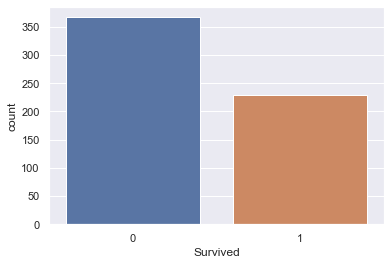

In [6]:
df_train['Survived'] = y_train
sns.countplot(x='Survived', data=df_train);

More people died than survived so let's make a first baseline and very naive prediction that everybody died. 
Although this is clearly a bad model, it will give us a baseline, against which to compare any future model that we build:

In [7]:
df_test['Survived'] = 0
# Compute accuracy of this model
pred_diff = y_test['Survived'] - df_test['Survived'].array
accuracy = 1 - sum(pred_diff)/len(pred_diff)
print(accuracy)

0.6169491525423729


OK! So our incredibly naive, baseline model was 61.7% accurate. This means that if we build more sophisticated models, they definitely need to perform better than this.

## Decision Tree

We're now going to build a model called a decision tree. Before doing that, we need to do a bit of data preparation and cleaning. We'll do all of this on the original dataset before the train-test split, to make sure we treat all rows the same:

In [8]:
# Impute missing numerical variables
df['Age'] = df.Age.fillna(df.Age.median())
df['Fare'] = df.Fare.fillna(df.Fare.median())

# Check out info of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Convert Sex into a numerical feature
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Select columns and view head
df = df[['Sex_male', 'Fare', 'Age','Pclass', 'SibSp','Survived']]
df.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,1,7.2500,22.0,3,1,0
1,0,71.2833,38.0,1,1,1
2,0,7.9250,26.0,3,0,1
3,0,53.1000,35.0,1,1,1
4,1,8.0500,35.0,3,0,0


In [10]:
# train test split
df_train, df_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1), df[['Survived']], test_size=0.33, random_state=41, stratify=df[['Survived']])

## Training your model

Now it's time to train your model. We're going to build a decision tree and what the training process actually does is figures out the optimal ways to split the tree:

![title](../img/decision-tree-titanic.png)

In [11]:
# Instantiate model and fit to data
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(df_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
# Make predictions and store in 'Survived' column of df_test
Y_pred = clf.predict(df_test)

In [13]:
# Compute accuracy of this model
clf.score(df_test, y_test)

0.8677966101694915

### HANDS-ON: fit, predict, and ML learning curves

Plot the learning curve as we increase the depth of the decision tree -- this is a plot which has the accuracy of the model on both the training and the test set. 

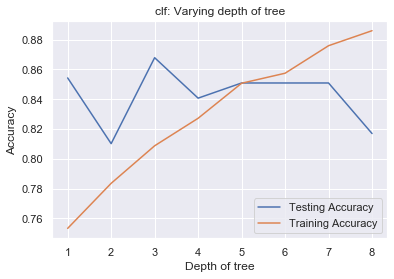

In [14]:
# Setup arrays to store train and test accuracies
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a Decision Tree Classifier
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(df_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(df_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(df_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()

**KEY NOTE:** You can see when the decision trees begin to overfit to the training set!

## Machine Learning: regression

The other common form of supervised learning is **regression**, in which we're predicting a continuous variable, rather than classifying from a finite number of labels. 

One great aspect of the `scikit-learn` API is that the .fit/.predict paradigm generalizes to all forms of supervised learning. You're going to perform regression on the `scikit` diabetes dataset, which we'll now import and check out together:

In [15]:
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_data = datasets.load_diabetes()

#
print(diabetes_data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [16]:
# split data into predictors and target
diabetes_X, diabetes_y = diabetes_data['data'], diabetes_data['target']

### HANDS ON: Building a regression model

Now it's your turn to build a linear regression model for this dataset using `scikit-learn`:

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


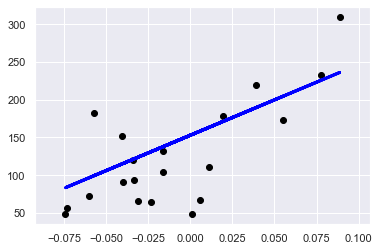

In [17]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3);

# 2. Neural networks

Now it's time for deep learning using neural networks. These are:

- ML models inspired by biological neural networks.
- Good for image classification, NLP, and more. Say more here.


![title](../img/george.jpg)

Image from [here](https://www.pnas.org/content/116/4/1074/tab-figures-data).

When making predictions with neural networks, we use a procedure called **forward propagation**. When training neural networks (that is, finding the parameters, called weights), we use a procedure called **back propogation**. To put it another way,

- **forward propagation** is for prediction (.predict());
- **back propogation** is for training (.fit()).



So let's first jump into forward propogation!

## 2.1 Forward propogation

### Single-layer perceptron

The first example is the single layer perceptron (SLP).
The parameters that change when we train the model are the weights.
Image is from [here](https://deepai.org/machine-learning-glossary-and-terms/perceptron).

![title](../img/perceptron.jpg)

To build the weighted sum, we take each input (feature) $x_i$, multiply it by the relevant weight $w_i$, and sum them all up. 

This is essentially a *weighted average*! Note that 

* if all the weights are the same $1/n$, the weighted sum _is_ the average of the features,
* if a weight $w_i=0$, then the respective $x_i$ does not contribute at all to the weighted sum, and
* if a weight $w_i$ is greater than a weight $w_j$, the corresponding $x_i$ contributed more to the weighted sum than $w_j$.

In `numpy`, **x** and **w** will be 1D arrays. To compute the weighted sum, you can take element-wise products of these arrays and then take the sum.

It's not necessary to know linear algebra here, but if you do know a little bit, you may recognize that **x** and **w** are vectors and that the weighted sum is the _dot product_ of these vectors so that the model is given by

- $y = w\cdot x + b $ (vectors).

For ease of writing code, we'll use the `np.dot()` function and pass it the relevant arrays. If you'd like, I encourage you to confirm that this does produce the weighted sum, by working through several examples.

**THE DATA:** We'll use a toy example of an e-commerce website. The features are 
* amount of time on website
* number of interactions
* number of customer support interactions

The target is amount spent in a year (if it's negative, we can interpret it as refunds), and thus this is a regression challenge. Note that this type of question isn't necessarily a good use case for deep learning (as opposed to image classification), but it has the benefit of providing a simpler example for pedagogical purposes. Also note that we don't really care about the untis of the features for the tiem being, but in a real-world case, you definitely would.

In [18]:
# One data point
x = np.array([10, 29, 2])

Now it's time to build a single layer perceptron using NumPy:

In [19]:
# x = np.random.rand(5) - 0.5 # one training data point, 5 features/columns
w = np.random.normal(size=3) # weights, one for each feature
b = 0 # bias/offset
y = np.dot(x, w) + b
print(y)

7.550704637768035


### HANDS ON: Single Layer Perceptron for classification

As stated, this wass a regressor, in that it predicts a contiuous variable. Classically, single layer perceptrons were classifiers. For a classification challenge, you can threshold the output of the regressor by using a step function, for example:

In [20]:
# One data point
x = np.array([10, 29, 2])
w = np.random.normal(size=3) # weights, one for each feature
b = 0 # bias/offset
y = np.dot(x, w) + b
z = np.sign(y)
print(z)

-1.0


For bonus points, you can also turn it into a logistic regression classifier:

In [21]:
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
# One data point
x = np.array([10, 29, 2])
w = np.random.normal(size=3) # weights, one for each feature
b = 0 # bias/offset
y = np.dot(x, w) + b
z = int(sigmoid(y) < 0.5)
print(z)

0


### HANDS ON: SLP For many data points

This was using a SLP for a single data point. You'll now write code to generalize to multiple data points:

We'll stick with the same toy e-commerce example:

In [22]:
# Create 5 data points
x = np.array([[10, 29, 2], [23, 3, 9], [11, 4, 3], [6, 15, 2], [15, 3, 3]])
print(x)

[[10 29  2]
 [23  3  9]
 [11  4  3]
 [ 6 15  2]
 [15  3  3]]


Now you're going to hand code an SLP regressor and classifier for these 5 data points:

In [23]:
# SLP for regression
w = np.random.normal(size=3)
b = -25
y = np.dot(x, w) - b
y

array([71.62271356, 32.96120174, 32.80613717, 49.23290731, 31.82057464])

In [24]:
#SLP for classification
w = np.random.normal(size=3)
b = 0
y = np.dot(x, w) - b
print(y)
z = np.sign(y)
z

[-47.74035652 -32.85634561 -19.82489176 -25.17551947 -25.20101942]


array([-1., -1., -1., -1., -1.])

For bonus points, you can also turn it into a logistic regression classifier:

In [25]:
# Logreg
w = np.random.normal(size=3)
b = 25
y = np.dot(x, w) - b
z = (sigmoid(y) < 0.5).astype(int)
z

array([1, 1, 1, 1, 1])

### Multilayer perceptron

Neural networks generally have many layers between the input and output layers. These layers are called *hidden layers*. To see how these work, let's add one layer to get a multilayer perceptron, such as in the image below! Image from [here](https://www.researchgate.net/figure/A-hypothetical-example-of-Multilayer-Perceptron-Network_fig4_303875065). 

![title](../img/mlp.png)

Notes:
* Each of the 5 node in 1st hidden layer has 4 inputs so it will have a 4 x 5 array for weights;
* The output layer has one node and 5 inputs so will have a 5 x 1 array of weights.

Let's stick with the toy e-commerce example from above (which has 3 inputs, not 4, remember). We'll first define the data and the weights:

In [26]:
x = np.array([[10, 29, 2]]) # generate data
w1 = np.random.normal(size=(3, 5)) # weights for hidden layer
w2 = np.random.normal(size=(5, 1)) # weights for output layer
b1 = np.random.normal(size=(1, 5))
b2 = np.random.normal(size=(1, 1))

And now we'll build our MLP classifier: for each layer, we'll perform the same computation as we did for the SLP above:

In [27]:
# MLP classifier
y1 = x @ w1 + b1 # @ is matrix multiplication (generalization of dot product above)
print(y1)
y2 = y1 @ w2 + b2
print(y2)
#g1 = relu(z1)
z = (sigmoid(y2) < 0.5).astype(int)
print(z)

[[30.96567735 29.16886797 31.97768763 53.84300726  5.29996862]]
[[-45.52095676]]
[[1]]


Notes:
* We've used a sigmoid function in the final layer. "True perceptrons" use a (Heaviside step) function but, generally speaking, if you use other functions, such as a sigmoid, it's still called a multilayer perceptron ([there's more about this here on wikipedia](https://en.wikipedia.org/wiki/Multilayer_perceptron));
* Similarly, "true perceptrons" are classifiers *but* MLPs, in the more general sense, can also be regressors;
* To build the MLP above, we've essentially just concatenated two linear operations so we still only have a linear regression! If the problem is non-linear, this won't be much use. To deal with non-linearities, we use activation functions. Let's do it!

### Activation functions

Historically, `tanh` has been a popular activation function (see below). We've also already seen sigmoid. A popular one these days is ReLU (Rectified Linear Unit), which is defined by:

In [28]:
def relu(x):
    return np.maximum(0,x)

At this point, we won't dive into which ones to use when but did wnt to highlight some common ones. Let's plot them together, to get a sense of what these functions look like:

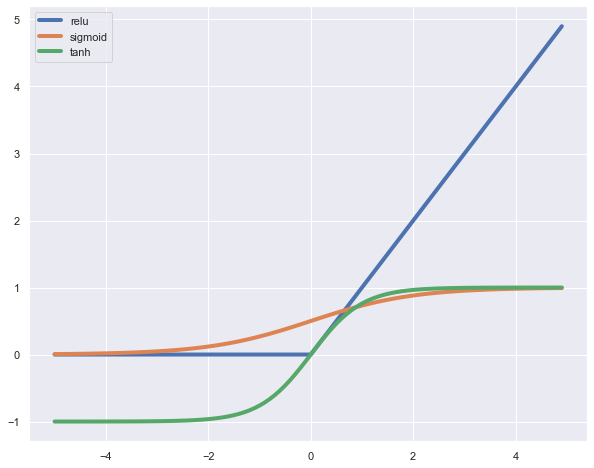

In [29]:
x = np.arange(-5, 5, 0.1)
plt.figure(figsize=(10,8))
plt.plot(x, relu(x), linewidth=4, label="relu");
plt.plot(x, sigmoid(x), linewidth=4, label="sigmoid")
plt.plot(x, np.tanh(x), linewidth=4, label="tanh")
plt.legend(loc="upper left");

**Note:** It's pretty cool that ReLU has been so powerful in introducing non-linearities into deep learning when it itself is piecewise linear with only two linear components!

### HANDS ON: Adding activation functions to your MLP

Use ReLU MLP now for 5 data points and one hidden layer with 8 nodes:

In [30]:
# 5 data points
x = np.array([[10, 29, 2], [23, 3, 9], [11, 4, 3], [6, 15, 2], [15, 3, 3]])

In [31]:
# generate weights and biases
w1 = np.random.normal(size=(3, 8))
w2 = np.random.normal(size=(8, 1))
b1 = np.random.normal(size=(1, 8))
b2 = np.random.normal(loc = 50, size=(1, 1))

In [32]:
# Compute 1st layer, including activation function
y1 = x @ w1 + b1
z1 = relu(y1)
print(z1)

[[ 0.          3.13888841 25.40839004  0.          0.         28.73936142
   0.         61.41215792]
 [16.67961544  4.96903089  0.         11.3282223   0.         29.12060352
   0.         48.29307224]
 [ 7.38682222  2.19138631  0.          4.81525602  0.         13.84191415
   0.         25.64287959]
 [ 0.          2.13946828 12.91657969  0.          0.         15.9888409
   0.         33.73356328]
 [12.6565988   2.37476812  0.          8.39707062  0.         16.56849808
   0.         30.38225892]]


In [33]:
# second layer + activation
z2 = y1 @ w2 + b2
y = np.sign(z2)
print(y)

[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]


### Deeper Networks

Now we'll build a regressor with 4 hidden layers (setting $b=0$ throughout to simplify slightly):

In [34]:
# 5 data points
x = np.array([[10, 29, 2], [23, 3, 9], [11, 4, 3], [6, 15, 2], [15, 3, 3]])
n = 4 # number of hidden layers
weights = {}
for i in range(n):
    #print(f"weights_{i}")
    weights[i] = np.random.normal(size=(3, 3))
weights[n] = np.random.normal(size=(3, 1))
weights[0]

array([[-0.96813459, -0.64750253, -0.06028707],
       [-1.23639507, -0.04193176,  0.59705689],
       [-0.67349793, -2.04894312, -0.37781875]])

In [35]:
# forward propogation
y = relu(x @ weights[0]) # first layer
for i in range(n-1):
    y = relu(y @ weights[i+1]) # hidden layers
y = np.sign(y @ weights[n])  # final layer
print(y)

[[1.]
 [0.]
 [1.]
 [1.]
 [0.]]


**A note on representation learning:** one of the most important sub-tasks of machine learning is feature engineering. One interesting aspect of deep learning is that neural networks tend to learn features implicitly, as a result of their structure. For example, the more layers a neural network has, the more complex features it can recognise: early layers can identify edges, then then combinations of edges, then corners, the more complex features, and so on. For more on representation learning, check out ["Representation Learning: A Review and New Perspectives"](https://arxiv.org/abs/1206.5538) by  Bengio et al.

Now we've got a handle on forward prop., let's dive into thinking about fitting/training our neural networks, backprop, and gradient descent!

## 2.2 Back propagation

Back propagation is the algorithm used to optimize the weights of neural networks. Before jumping into back prop, let's first check out how gradient descent can be used to optimize the weights of perceptrons.

## Gradient descent

Now we know how to use forward propogation to make predictions, it's time to think about how to train a neural network! That is, how we determine the best model parameters. Reminder: our NN model parameters are the weights and biases.

We want to minimize the difference between the target variable $y$ and the prediction made by our forward propagation algorithm. So after a forward pass, we use *gradient descent* to change the weights and then do another forward pass and see if we have improved our predictions. Image below from [here](https://www.datasciencecentral.com/profiles/blogs/alternatives-to-the-gradient-descent-algorithm).

![title](../img/gradient-descent.png)

### Gradient Descent and the Single Layer Perceptron

Gradient descent is about optimizing the weights after a round of forward propagation.

![title](../img/perceptron.jpg)

Let's remind ourselves of SLP regressor forward propagation for a single data point. Let's write a function for our SLP, as we've written it out a few times already (if you do it 3+ times, write a function!):

In [36]:
# write SLP function
def slp(x, w, b):
    y = x @ w + b
    return y

Now let's use this function to do one forward pass for a single data point:

In [37]:
# for single data point
x = np.array([[10, 29, 2, 7]])/100
y = 10
b = 0
w = np.random.normal(size=4) # initialize weights

y_hat = slp(x, w, b)
print(y_hat)

[0.48255803]


* Discuss how we want to shift each weight slightly in a direction that will improve the prediction *so* we look at how bad the prediction was (prediction minus actual value), take the dot product with the relevant xs, and multiply by the learning rate (which we set and this decides how drastic the changes to the weights will be; an image will help explain this, as will an equation, HBA!). This is essentially calculating the slope and we then move down in that direction!
* also note that if the prediction is correct, then y_hat - y is zero and there's no change at all.
* note that we're updating all weights simultaneously also (in contrast to back propagation, as we'll see).

Now let's hand code one pass of gradient descent:

In [38]:
# gradient descent
y_hat = slp(x, w, b)
learning_rate = 0.1
delta_w = learning_rate*((y_hat - y) * x)
delta_b = learning_rate*(y_hat - y) 
#print(delta_w)
w = (w + delta_w).reshape(4)
b = b + delta_b

### HANDS ON: Plot model performance over epochs

It's your turn to now plot the difference between y_hat and y as we alternate between forward prop and updating the weights using gradient descent. Note that a round of forward prop and gradient descent is commonly called an epoch.

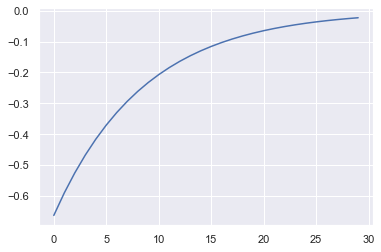

In [39]:
# define some lists to plot y_hat - y as we iterate
y = 0.1
n_epochs = 30
diff = list()
for _ in range(n_epochs):
    y_hat = slp(x, w, b)
    diff.append(y_hat - y)
    # gradient descent
    learning_rate = 0.1
    delta_w = learning_rate*((y_hat - y) * x)
    delta_b = learning_rate*(y_hat - y) 
    #print(delta_w)
    w = (w - delta_w).reshape(4)
    b = b - delta_b
    #print(y_hat - y)
plt.plot(diff);

### HANDS ON: For many data points

It's now time to perform the same but for many data points! Instead of plotting the difference (which will be an array/vector), we'll plot the dot product of the difference with itself, which is a measure of distance.

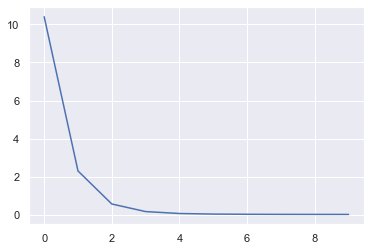

In [40]:
# Create data array
x = np.array([[10, 29, 2], [23, 3, 9], [11, 4, 3], [6, 15, 2], [15, 3, 3]])/10
w = np.random.normal(size=3)
b = 0.1
diff = list()
for _ in range(10):
    y_hat = slp(x, w, b)
    diff.append((y_hat - y)@(y_hat - y))
    learning_rate = 0.1
    delta_w = learning_rate*((y_hat - y) @ x)
    #print(delta_w)
    w = (w - delta_w).reshape(3)
plt.plot(diff);

### Back propagation

In a similar manner to how forward prop takes the input data of features through your neural network and outputs a prediction in the output layer, back prop takes the error from your prediction and propogates it back through the network.

Back prop calculates the slopes necessary to update the weights as it propagates back through the network. To calculate these slopes, we need use the chain rule from calculus, which is outside the scope of this workshop. You can find out more from Sebastian Raschka's great work [here](https://sebastianraschka.com/faq/docs/backprop-arbitrary.html).

To say a little more in order to give a sense of things, what we're doing when performing back propagation is we're approximating the slope of the error (loss) function with respect to each weight. What the chain rule tells us is that the slope (gradient) of the error with respect to a given weight is the product of:

- the value of the node going into that weight,
- the slope of the activation function at the weight's output, and
- the slope of the error (loss) function with respect to the node it goes into.

